In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats

In [2]:
# Define the local file path on your computer
file_path = r'C:\Users\allre\OneDrive\Documents\BrentOil.csv'

# Load the CSV file
data = pd.read_csv(file_path)

In [3]:
data

,Date,OpenBrent,HighBrent,LowBrent,CloseBrent,VolumeBrent,OpenCrude,HighCrude,LowCrude,CloseCrude,...,OpenHeating,HighHeating,LowHeating,CloseHeating,VolumeHeating,OpenNatural,HighNatural,LowNatura,CloseNatural,VolumeNatural
0,2000-01-04,23.90,24.70,23.89,24.39,32509,25.20,25.69,24.71,25.55,...,0.6720,0.6830,0.6540,0.6778,25311,2.130,2.200,2.130,2.176,30152
1,2000-01-05,24.25,24.37,23.70,23.73,30310,25.50,25.61,24.87,24.91,...,0.6790,0.6790,0.6650,0.6655,18691,2.180,2.200,2.125,2.168,27946
2,2000-01-06,23.55,24.22,23.35,23.62,44662,24.80,25.34,24.51,24.78,...,0.6645,0.6830,0.6550,0.6628,27082,2.165,2.220,2.135,2.196,29071
3,2000-01-07,23.57,23.98,23.05,23.09,34826,24.65,25.00,24.15,24.22,...,0.6600,0.6710,0.6460,0.6475,26320,2.195,2.230,2.155,2.173,28455
4,2000-01-10,23.04,23.78,23.04,23.73,26388,24.22,24.75,24.02,24.67,...,0.6445,0.6535,0.6355,0.6472,20721,2.180,2.255,2.165,2.216,28916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5583,2022-06-10,122.89,124.33,119.81,122.01,294278,121.46,122.75,118.33,120.67,...,4.4187,4.5135,4.3155,4.3667,38656,8.997,9.149,8.622,8.850,134611
5584,2022-06-13,121.94,123.70,118.93,122.27,257105,120.19,122.25,117.47,120.93,...,4.3612,4.3762,4.1949,4.2834,46406,8.920,8.950,8.382,8.609,167556
5585,2022-06-14,121.88,125.19,118.91,121.17,291264,121.09,123.68,116.62,118.93,...,4.2749,4.4570,4.2488,4.3940,36652,8.686,8.889,7.008,7.189,273717
5586,2022-06-15,120.79,121.88,117.75,118.51,231061,119.07,119.61,114.60,115.31,...,4.3816,4.6070,4.3557,4.5470,36908,7.269,7.698,7.201,7.420,123589


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
Date             0
OpenBrent        0
HighBrent        0
LowBrent         0
CloseBrent       0
VolumeBrent      0
OpenCrude        0
HighCrude        0
LowCrude         0
CloseCrude       0
VolumeCrude      0
OpenHeating      0
HighHeating      0
LowHeating       0
CloseHeating     0
VolumeHeating    0
OpenNatural      0
HighNatural      0
LowNatura        0
CloseNatural     0
VolumeNatural    0
dtype: int64


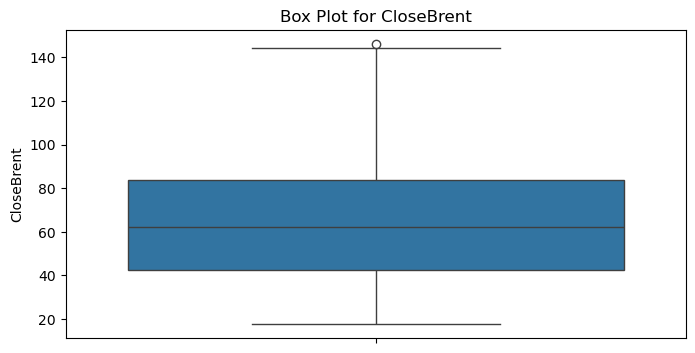

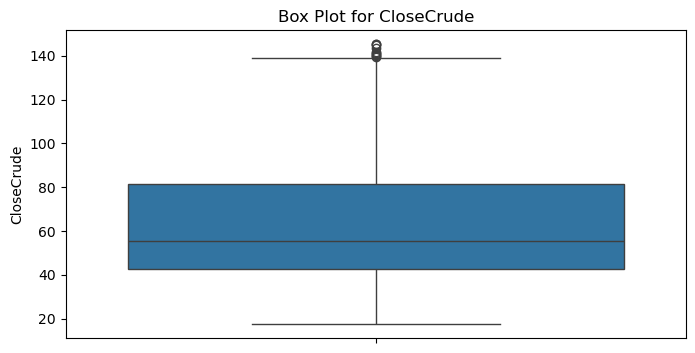

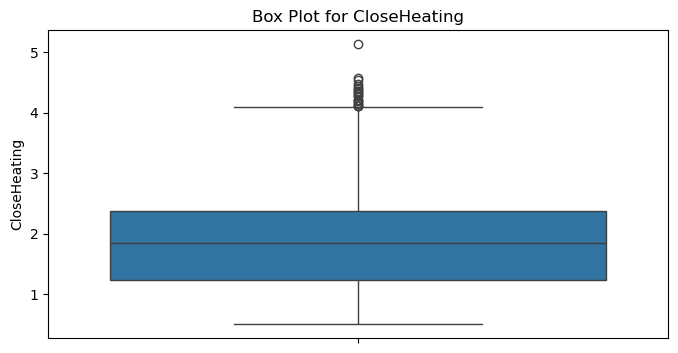

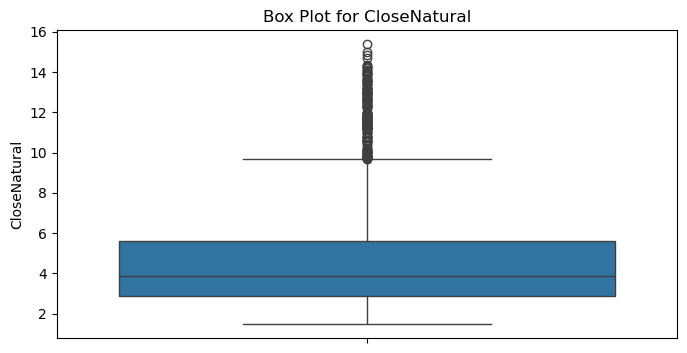

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box plots for outlier detection
columns_to_plot = ['CloseBrent', 'CloseCrude', 'CloseHeating', 'CloseNatural']
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f"Box Plot for {col}")
    plt.show()

In [6]:
# Focus on relevant columns
columns_of_interest = ['Date', 'CloseBrent', 'CloseCrude', 'CloseHeating', 'CloseNatural']
data = data[columns_of_interest]

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\allre\AppData\Local\Temp\ipykernel_12036\3149640136.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [7]:
# Detect outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

# Apply outlier handling to relevant numeric columns
for col in ['CloseBrent', 'CloseCrude', 'CloseHeating', 'CloseNatural']:
    handle_outliers(data, col)

C:\Users\allre\AppData\Local\Temp\ipykernel_12036\2943427730.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] < lower_bound, lower_bound,
C:\Users\allre\AppData\Local\Temp\ipykernel_12036\2943427730.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] < lower_bound, lower_bound,
C:\Users\allre\AppData\Local\Temp\ipykernel_12036\2943427730.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

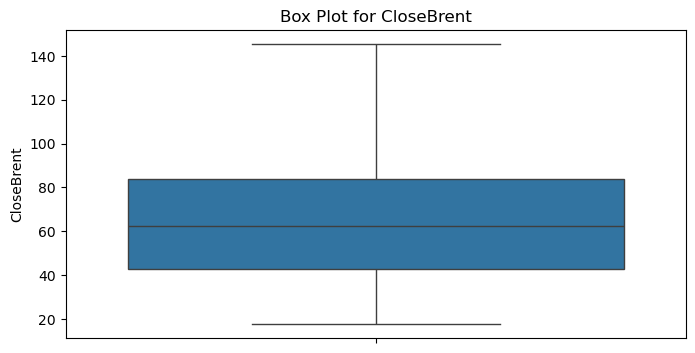

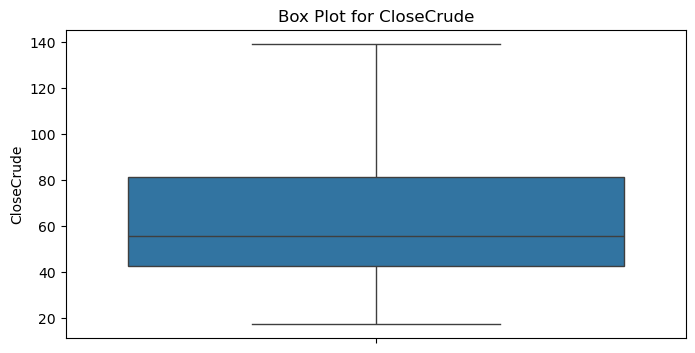

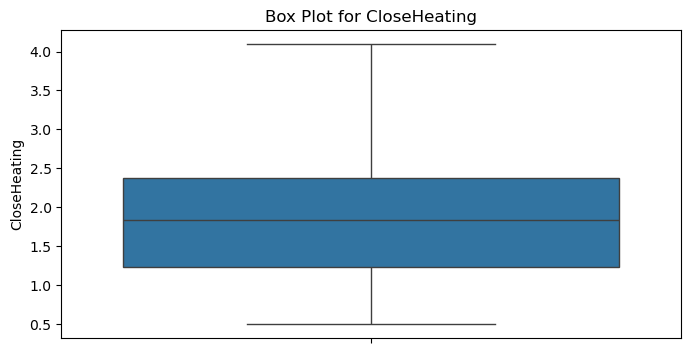

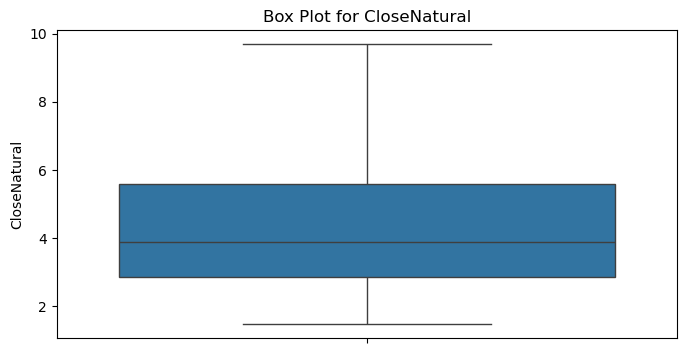

In [8]:
# Box plots for outlier detection
columns_to_plot = ['CloseBrent', 'CloseCrude', 'CloseHeating', 'CloseNatural']
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f"Box Plot for {col}")
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import statsmodels.api as sm

# Define the target variable and initial predictors
target = 'CloseBrent'
predictors = [
    'CloseCrude', 'CloseHeating', 'CloseNatural'
]

# Drop rows with missing values
data_cleaned = data.dropna(subset=[target] + predictors)

# Prepare independent (X) and dependent (y) variables
X = data_cleaned[predictors]
y = data_cleaned[target]

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initial VIF calculation
vif_initial = calculate_vif(X)



In [10]:
vif_initial

,Feature,VIF
0,CloseCrude,108.523500
1,CloseHeating,93.774206
2,CloseNatural,4.949940


In [11]:
# Iteratively remove variables with high VIF (>5)
while vif_initial['VIF'].max() > 5:
    feature_to_remove = vif_initial.sort_values('VIF', ascending=False).iloc[0]['Feature']
    X = X.drop(columns=[feature_to_remove])
    vif_initial = calculate_vif(X)

In [12]:
vif_initial

,Feature,VIF
0,CloseHeating,3.916413
1,CloseNatural,3.916413


In [13]:
# Define the target variable and initial predictors
target = 'CloseBrent'
predictors = [
    'CloseCrude', 'CloseHeating', 'CloseNatural'
]

# Drop rows with missing values
data_cleaned = data.dropna(subset=[target] + predictors)

# Prepare independent (X) and dependent (y) variables
X = data_cleaned[predictors]
y = data_cleaned[target]

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initial VIF calculation
vif_initial = calculate_vif(X)

# Iteratively remove variables with high VIF (>5)
while vif_initial['VIF'].max() > 5:
    feature_to_remove = vif_initial.sort_values('VIF', ascending=False).iloc[0]['Feature']
    X = X.drop(columns=[feature_to_remove])
    vif_initial = calculate_vif(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model with R² and Adjusted R²
r_squared = model.score(X_test, y_test)
n = len(y_test)
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

# Calculate residuals for diagnostics
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Prepare results for user
results = {
    "Final Predictors": X.columns.tolist(),
    "VIF After Removal": calculate_vif(X).to_dict(),
    "R²": r_squared,
    "Adjusted R²": adjusted_r_squared
}



In [14]:
# Add a constant to the predictors (for statsmodels)
X_train_with_constant = sm.add_constant(X_train)

# Fit the model using statsmodels
sm_model = sm.OLS(y_train, X_train_with_constant).fit()

# Print the model summary
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:             CloseBrent   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 8.212e+04
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        08:04:29   Log-Likelihood:                -13337.
No. Observations:                4470   AIC:                         2.668e+04
Df Residuals:                    4467   BIC:                         2.670e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5535      0.224     -2.466   

In [15]:
results

{'Final Predictors': ['CloseHeating', 'CloseNatural'],
 'VIF After Removal': {'Feature': {0: 'CloseHeating', 1: 'CloseNatural'},
  'VIF': {0: 3.9164128402166125, 1: 3.9164128402166094}},
 'R²': 0.9752375629912342,
 'Adjusted R²': 0.9751931460638642}

In [16]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Add a constant to X_test
X_test_with_constant = sm.add_constant(X_test)

# Perform Breusch-Pagan test
bp_test_stat, bp_p_value, _, _ = het_breuschpagan(residuals, X_test_with_constant)

# Display the results
bp_results = {
    "Breusch-Pagan Test Statistic": bp_test_stat,
    "Breusch-Pagan P-Value": bp_p_value,
    "Homoscedasticity Observations": "Residuals likely homoscedastic"
    if bp_p_value > 0.05
    else "Evidence of heteroscedasticity"
}

bp_results


{'Breusch-Pagan Test Statistic': 122.84272243043306,
 'Breusch-Pagan P-Value': 2.1136922412853534e-27,
 'Homoscedasticity Observations': 'Evidence of heteroscedasticity'}

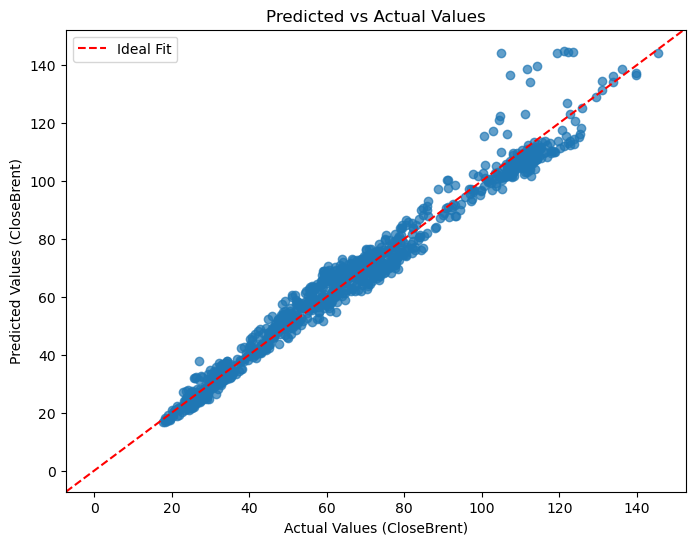

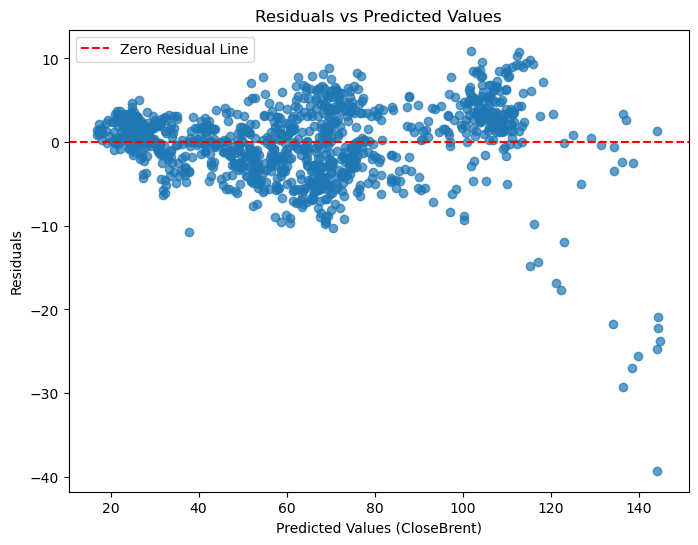

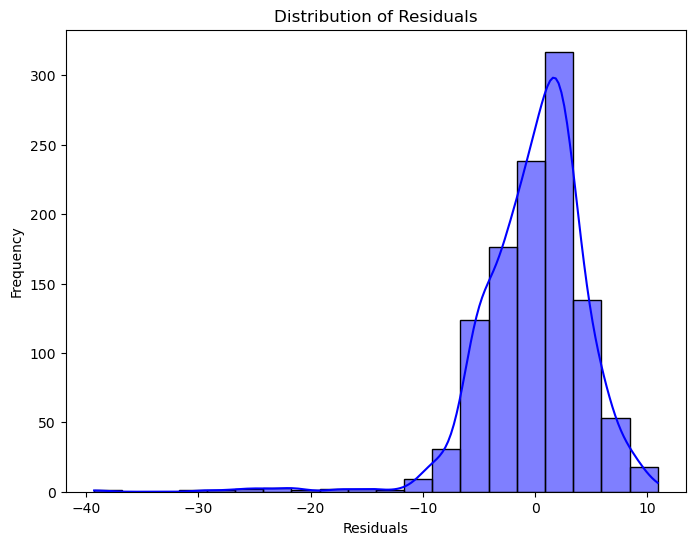

{'Shapiro-Wilk Test Statistic': 0.8976127620562646,
 'Shapiro-Wilk P-Value': 1.192848907829471e-26,
 'Homoscedasticity Observations': 'Residuals appear homoscedastic with no obvious patterns'}

In [17]:
from scipy.stats import shapiro
# Scatter plot of predicted vs actual values to check linearity
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values (CloseBrent)")
plt.ylabel("Predicted Values (CloseBrent)")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Ideal Fit")
plt.legend()
plt.show()

# Residual plot to check homoscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values (CloseBrent)")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Shapiro-Wilk test for normality of residuals
shapiro_test_stat, shapiro_p_value = shapiro(residuals)

# Display results of the Shapiro-Wilk test
{
    "Shapiro-Wilk Test Statistic": shapiro_test_stat,
    "Shapiro-Wilk P-Value": shapiro_p_value,
    "Homoscedasticity Observations": "Residuals appear homoscedastic with no obvious patterns"  
}


In [18]:
# Apply a log transformation to the dependent variable (CloseBrent)
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)


In [19]:
# Add a constant to the predictors (for statsmodels)
X_train_with_constant = sm.add_constant(X_train)

# Fit the model using statsmodels
log_model = sm.OLS(y_train_log, X_train_with_constant).fit()

# Print the summary of the log-transformed model
print(log_model.summary())



                            OLS Regression Results                            
Dep. Variable:             CloseBrent   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 3.131e+04
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        08:04:30   Log-Likelihood:                 2886.1
No. Observations:                4470   AIC:                            -5766.
Df Residuals:                    4467   BIC:                            -5747.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9841      0.006    501.100   

In [20]:
# Add constant to X_test
X_test_with_constant = sm.add_constant(X_test)

# Predict the log-transformed values on the test set
y_pred_log = log_model.predict(X_test_with_constant)

# Calculate residuals for the log-transformed model
log_residuals = y_test_log - y_pred_log




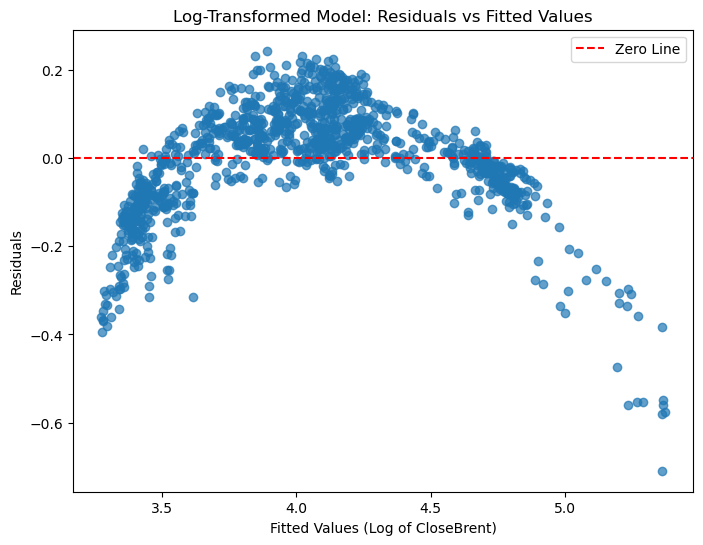

In [21]:
# Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_log, log_residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title("Log-Transformed Model: Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Log of CloseBrent)")
plt.ylabel("Residuals")
plt.legend()
plt.show()


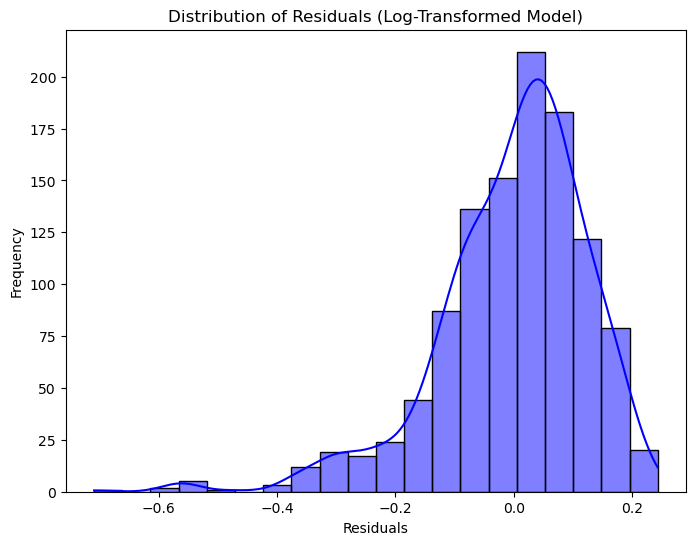

In [22]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(log_residuals, kde=True, bins=20, color='blue')
plt.title("Distribution of Residuals (Log-Transformed Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [23]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality of residuals
shapiro_test_stat_log, shapiro_p_value_log = shapiro(log_residuals)

# Display results of the Shapiro-Wilk test
print("Shapiro-Wilk Test Statistic:", shapiro_test_stat_log)
print("Shapiro-Wilk P-Value:", shapiro_p_value_log)


Shapiro-Wilk Test Statistic: 0.9321169032756215
Shapiro-Wilk P-Value: 4.0587724871119674e-22


In [24]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(log_model.resid, X_train_with_constant)

# Extract results
bp_stat = bp_test[0]  # Breusch-Pagan test statistic
bp_pvalue = bp_test[1]  # p-value of the test

# Print results
print(f"Breusch-Pagan test statistic: {bp_stat}")
print(f"p-value: {bp_pvalue}")

# Interpretation
if bp_pvalue < 0.05:
    print("The null hypothesis of homoscedasticity is rejected. Residuals exhibit heteroscedasticity.")
else:
    print("Fail to reject the null hypothesis. Residuals appear to have constant variance.")


Breusch-Pagan test statistic: 182.68802928099615
p-value: 2.1369703021608157e-40
The null hypothesis of homoscedasticity is rejected. Residuals exhibit heteroscedasticity.
